In [64]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

data = pd.read_csv('Hospital.csv')
data.drop(columns=[col for col in data.columns if 'unnamed' in col.lower()], inplace=True)

F1 scores of all the models

In [131]:
data.Source.values.tolist()

['huggingface',
 'huggingface',
 'huggingface',
 'huggingface',
 'huggingface',
 'huggingface',
 'gliner',
 'gliner',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'ollama_vision',
 'openai',
 'openai',
 'openai',
 'openai',
 'openai',
 'openai',
 'openai',
 'openai',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'openai_vision',
 'huggingface',
 'huggingface',
 'huggingface',
 'hugg

In [65]:
data["Image"] = data['LLM'].apply(lambda x: True if 'ImageInput' in x else False)
df = data.copy()


<Axes: title={'center': 'F1 Score by LLM Base Group'}, xlabel='LLM'>

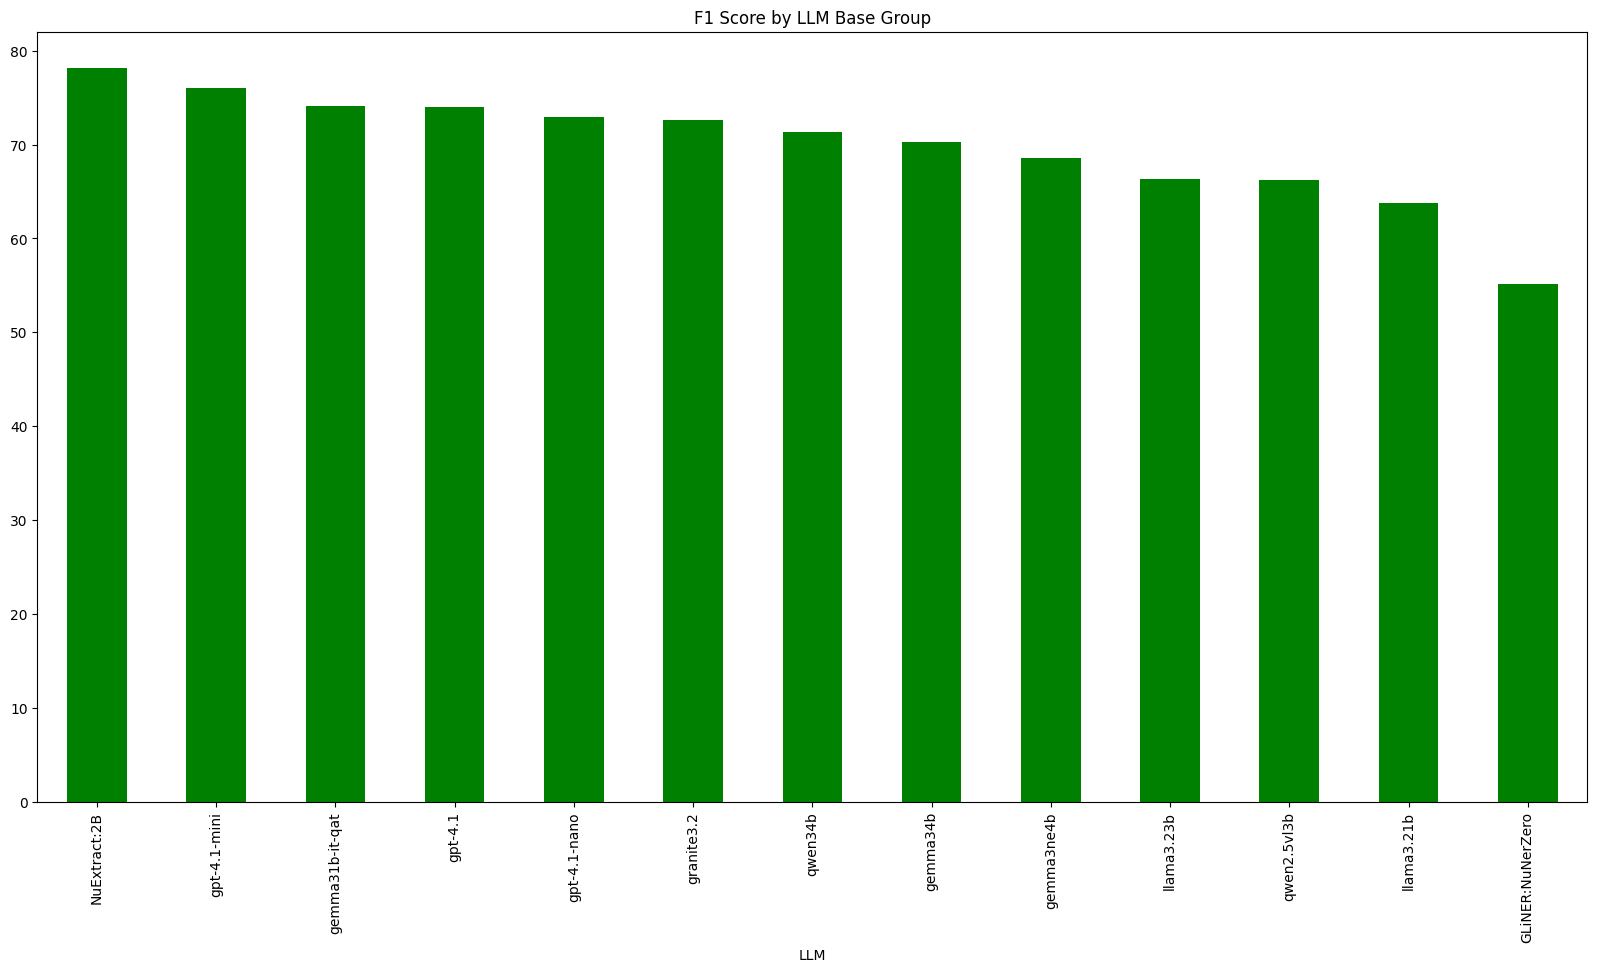

In [66]:
df['LLM'] = df['LLM'].apply(lambda x: x.replace('*ImageInput*', ""))
d = df.groupby('LLM').F1score.mean().sort_values(ascending=False)
d.plot(kind='bar', figsize=(20, 10), x='LLM', y='F1score', color='green',title='F1 Score by LLM Base Group')


Compare using the LTNER few-shot prompt or the normal prompt across all models

In [75]:
data.head()
df = data.groupby(['Prompt']).F1score.mean().sort_values(ascending=False)
df.head(20)

Prompt
LTNER/GPT-NER    74.911577
Normal           68.147613
Name: F1score, dtype: float64

[Text(0, 0, '74.9116'), Text(0, 0, '68.1476')]

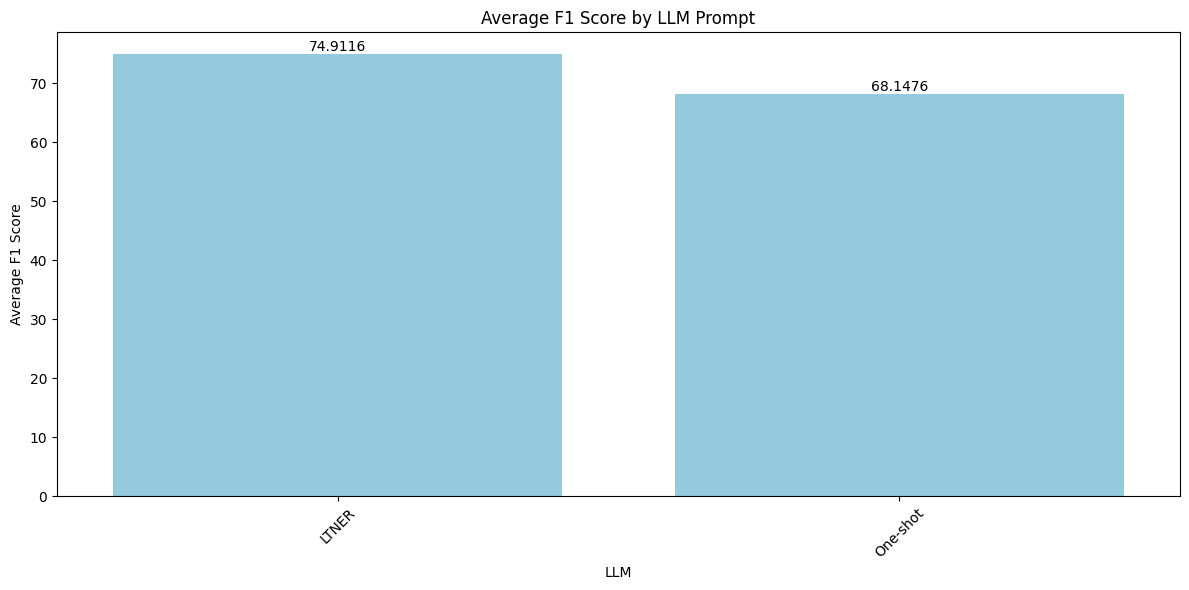

In [76]:
fig, axes = plt.subplots(figsize=(12, 6))
sns.barplot(x=['LTNER', 'One-shot'], y=df.values, color='skyblue', ax=axes)
plt.title('Average F1 Score by LLM Prompt')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.tight_layout()
axes.bar_label(axes.containers[0]) # type: ignore

F1 scores for all LLM models

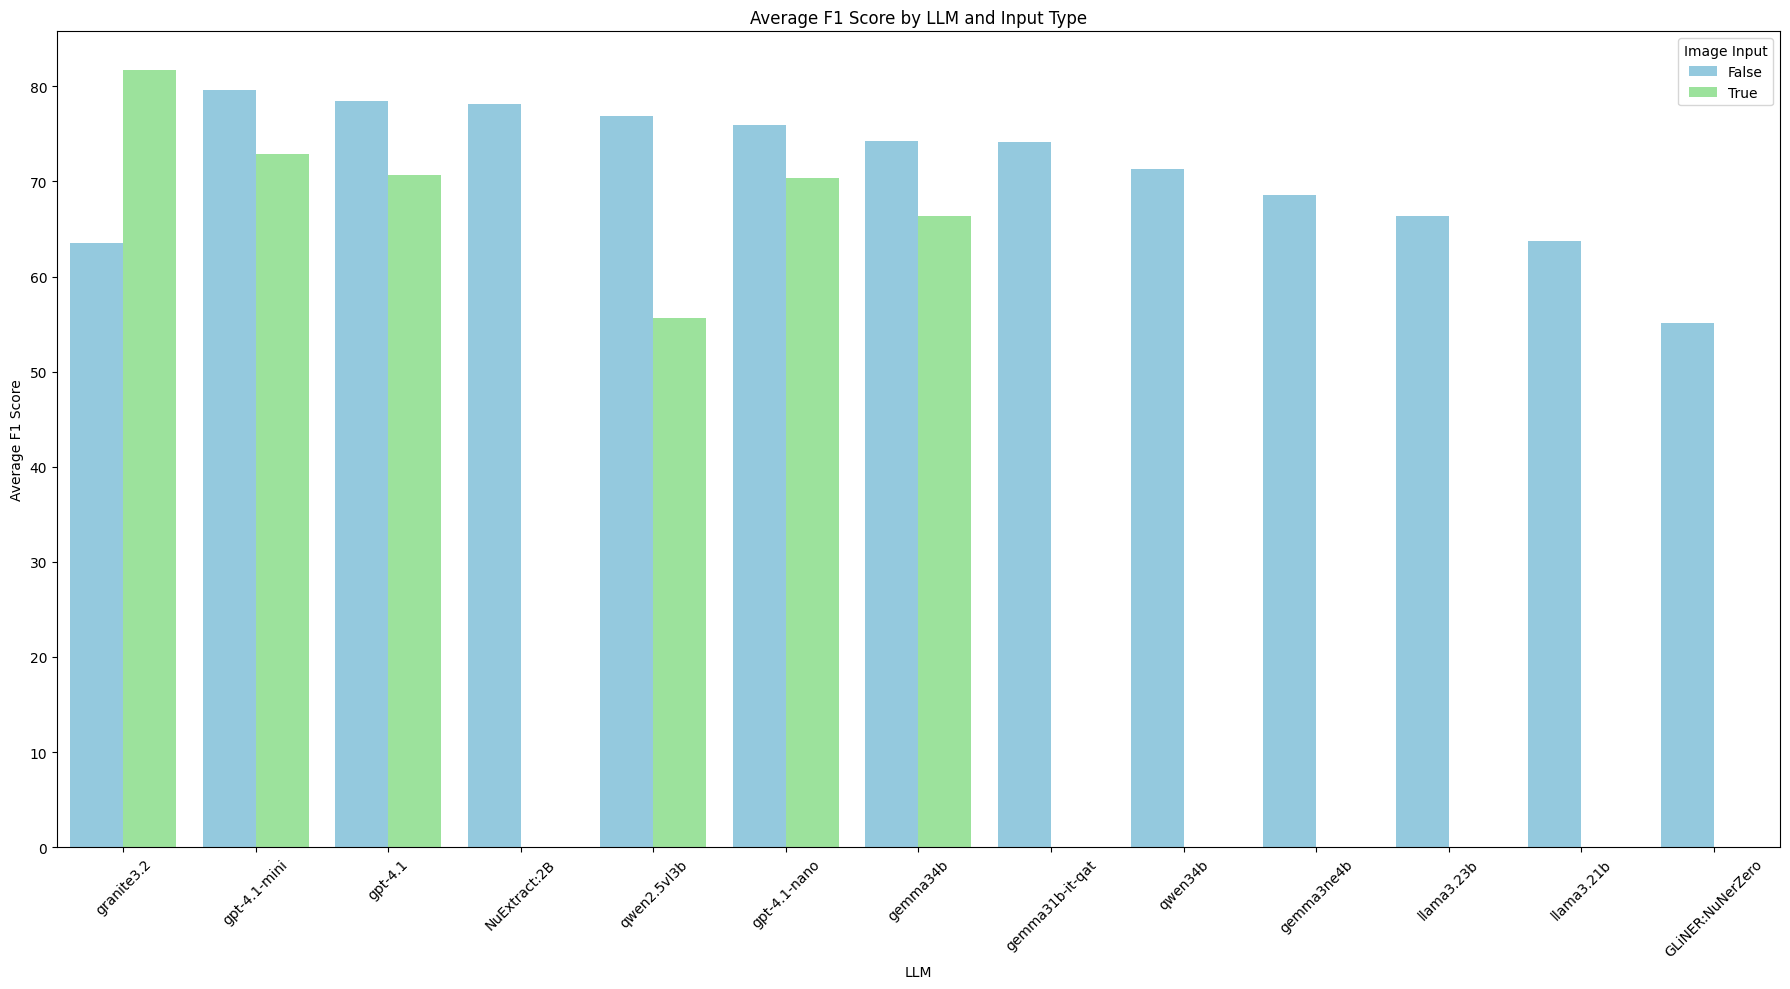

In [124]:
inputType = data.groupby(['LLM', 'Image']).F1score.mean().sort_values(ascending=False)
inputType.head()
colors = ['skyblue', 'lightgreen']
plt.figure(figsize=(18, 10))
sns.barplot(x=inputType.index.get_level_values(0), y=inputType.values, hue=inputType.index.get_level_values(1), palette=colors)
plt.title('Average F1 Score by LLM and Input Type')
plt.xlabel('LLM')
plt.ylabel('Average F1 Score')
plt.xticks(rotation=45)
plt.legend(title='Image Input', loc='upper right')
plt.tight_layout()
plt.show()

,LLM,F1score,Input_Type,LLM_clean
0,GLiNER:NuNerZero,55.100289,Text Input,GLiNER:NuNerZero
1,NuExtract:2B,78.122511,Text Input,NuExtract:2B
2,gemma31b-it-qat,74.107406,Text Input,gemma31b-it-qat
3,gemma34b,70.316684,Text Input,gemma34b
4,gemma3ne4b,68.536692,Text Input,gemma3ne4b


LLM               Image
granite3.2        True     81.697916
gpt-4.1-mini      False    79.626279
gpt-4.1           False    78.495264
NuExtract:2B      False    78.122511
qwen2.5vl3b       False    76.891745
gpt-4.1-nano      False    75.943047
gemma34b          False    74.263610
gemma31b-it-qat   False    74.107406
gpt-4.1-mini      True     72.842407
qwen34b           False    71.293661
gpt-4.1           True     70.634577
gpt-4.1-nano      True     70.347897
gemma3ne4b        False    68.536692
gemma34b          True     66.369758
llama3.23b        False    66.315393
llama3.21b        False    63.728751
granite3.2        False    63.501105
qwen2.5vl3b       True     55.610232
GLiNER:NuNerZero  False    55.100289
Name: F1score, dtype: float64